![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Loading the Dataset

The data is located in the `data/census-data.csv` CSV file. Take a look at the structure of it and the fields it has. You will notice that **it doesn't have a header**. 

In [2]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We used a few special parameters to correctly parse the csv. As the header is missing, pandas is assigning numbers to the columns.

**This is when the fun starts...**
<br><br><br>

---

### Exercise: Rename the columns

Use the names contained in `col_names` to properly name the columns (and replace the numbers). 

In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

Once everything works, it'll look something like this:

In [4]:
col_dict={i:col_names[i] for i in list(np.arange(len(col_names)))}

In [5]:
df.rename(columns=col_dict, inplace=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exercise: Cleaning the data

You'll notice that some columns have invalid values (`workclass`, `occupation`, and `native-country`).

###### a. What are those invalid values?

Identify the invalid values of `workclass` (spoiler, it's a `?` question mark):

In [7]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
# Results

In [9]:
df.replace('?',np.NaN, inplace=True)

###### b. Removing those rows

Your task now is to remove those invalid rows (all the ones containing `?`). There are different ways of doing this, so this is entirely up to you. This is the expected output of your dataframe:

In [10]:
df.dropna(inplace=True)

In [11]:
# Result:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Convert `income` to an ordered categorical type

As you'll see, `income` has two values `<=50K` and `>50K`:

In [12]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Your job is to turn them into an **ORDERED** categorical type with the following order: `['<=50K', '>50K']`

In [13]:
from pandas.api.types import CategoricalDtype
df['income']=df['income'].astype('object')
df['income']=df['income'].astype(CategoricalDtype(['<=50K','>50K'],ordered=True))

In [14]:
# Expected result:
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable _">50K"_ or _"<=50K"_ and concatenate them to our dataframe.

In [15]:
pd.get_dummies(df['income'])
pd.concat([df,pd.get_dummies(df['income'])],axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,0,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0,1


In [16]:
# Expected result:

### Exercise: Plot a **distplot** showing the distribution of `age`.

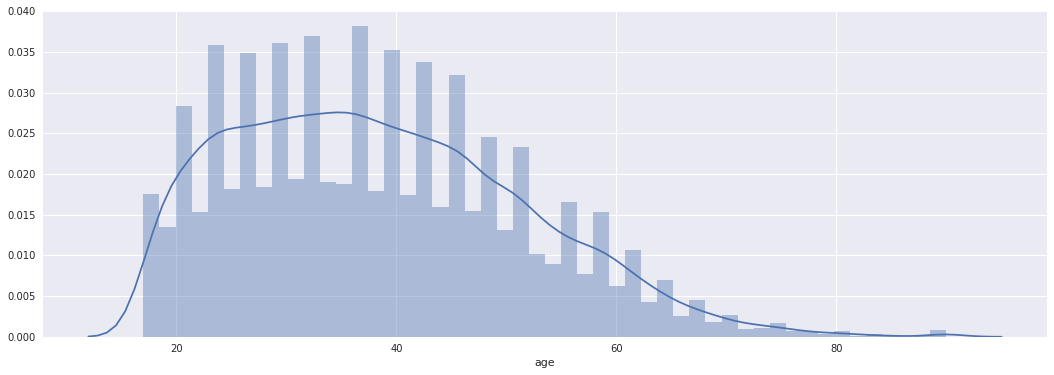

In [17]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.distplot(df.age, ax=ax)

In [18]:
# Expected output

### Exercise: Plot a **boxplot** showing the distribution of `age`.

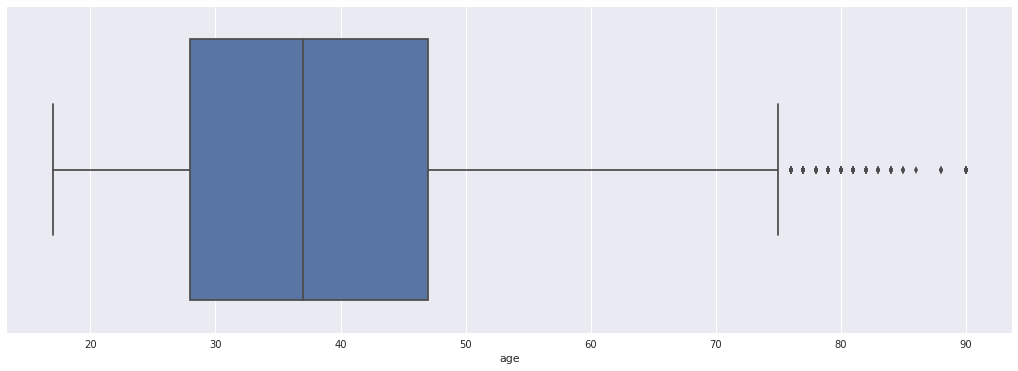

In [19]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(df.age, ax=ax)

In [20]:
# Expected output

### Exercise: Remove outlier values from `age` and plot the previous boxplot again.

_Suppose values higher than 70 as outliers_.

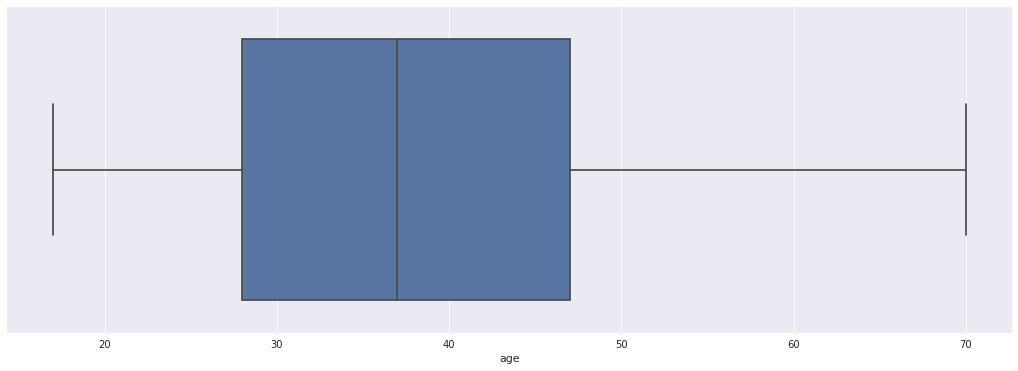

In [21]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(df[df.age <=70].age, ax=ax)

In [22]:
# Expected solution:

### Exercise: How many people work more than 20 hours per week?

In [23]:
len(df.loc[df['hours-per-week']>20])

27774

In [24]:
# Expected output

### Exercise: How many men and women are? Show totals and proportion over all the data.

In [25]:
df.sex.value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [26]:
df.sex.value_counts(normalize=True)

Male      0.675685
Female    0.324315
Name: sex, dtype: float64

In [27]:
# Expected output

### Exercise: Plot a bar plot showing the income by gender

_Hint: Check [countplots](https://seaborn.pydata.org/tutorial/categorical.html#bar-plots) in Seaborn docs_

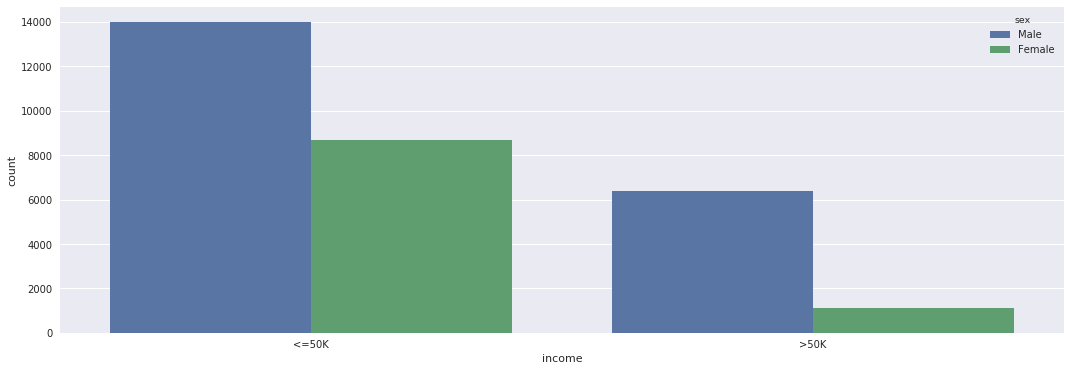

In [28]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='income', hue='sex',data=df)

In [29]:
# Expected Result:

### Exercise: Create a bar plot showing count of `race`s

It should look like this:

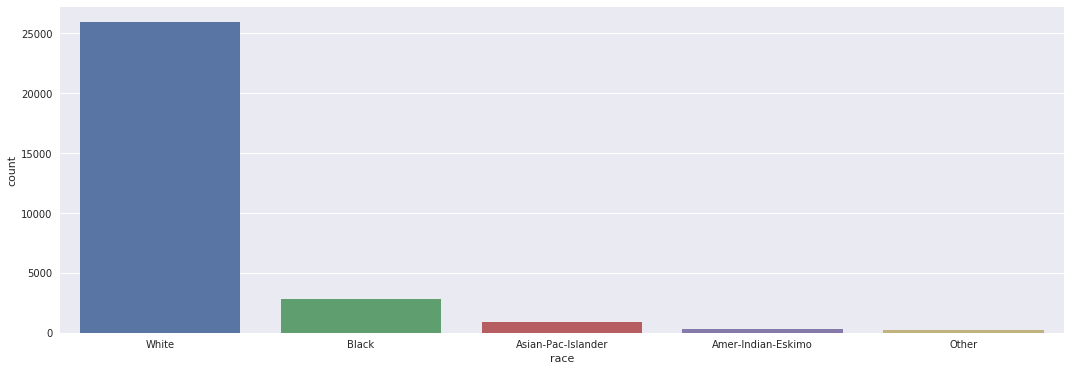

In [30]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='race', data=df)

In [31]:
# Expected result

### Exercise: Count per `race`

Using grouping and aggregation functions, count how many people are per each race:

In [32]:
df.groupby(['race']).agg({'race':'count'})

,race
race,
Amer-Indian-Eskimo,286
Asian-Pac-Islander,895
Black,2817
Other,231
White,25933


In [33]:
# Expected result:

### Exercise: Create a barplot with the `occupation` column

We want to check the number of people for each `occupation`. In this case, we want to see a nice, sorted plot like this one:

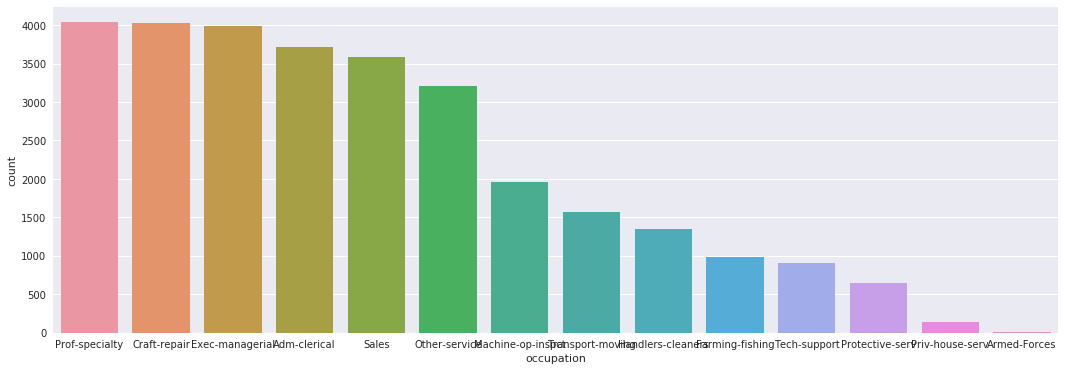

In [34]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index)

In [35]:
# Expected result:

### Exercise: Count per `occupation`

Using grouping and aggregation functions, count how many people are per each occupation:

In [36]:
df.groupby(['occupation']).agg({'occupation':'count'})

,occupation
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [37]:
# Expected output

### Exercise: Display capital gains per occupation

Capital gain is defined as _"income from investment sources, apart from wages/salary"_, is basically people generating profits from investments out of their regular job. Show the **average** capital gain per occupation. It should look something like this:

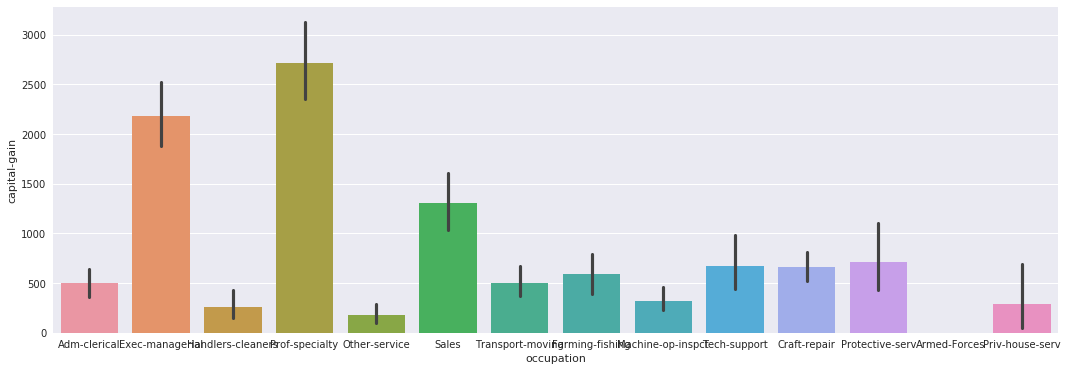

In [44]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='occupation', y='capital-gain', data=df)

In [38]:
# Expected result:

### Exercise: Use grouping to obtain the same results as the previous plot

Using grouping functions, generate the same results as the plot above. Expected output:

In [42]:
df.groupby(['occupation']).agg({'capital-gain':'mean'})

,capital-gain
occupation,
Adm-clerical,497.097286
Armed-Forces,0.000000
Craft-repair,657.586849
Exec-managerial,2185.330912
Farming-fishing,592.707786
Handlers-cleaners,258.140000
Machine-op-inspct,323.825025
Other-service,181.705479
Priv-house-serv,291.594406


In [110]:
# Expected result

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group

Create a bar plot that shows in that has `race` as the X axis, a `sex` hue and displays the average capital gain for each group. Expected output:

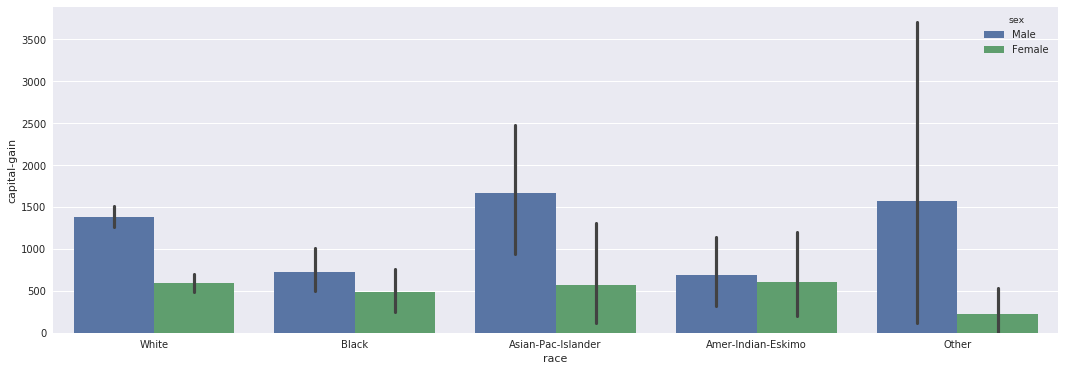

In [46]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='race', y='capital-gain', hue='sex', data=df)

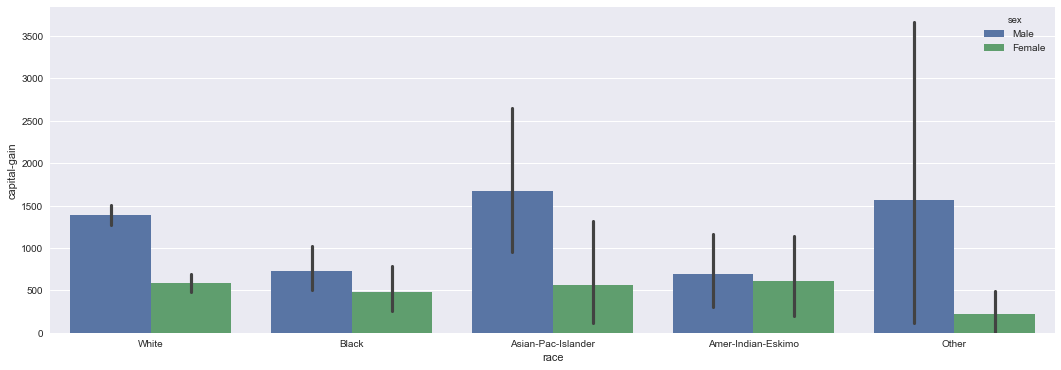

In [89]:
# Expected output

### Exercise: Use grouping to obtain the same results as the previous plot

Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group.

In [43]:
df.groupby(['race','sex']).agg({'capital-gain':'mean'})

capital-gain
race               sex                 
Amer-Indian-Eskimo Female    605.682243
                   Male      692.932961
Asian-Pac-Islander Female    564.204082
                   Male     1666.455907
Black              Female    484.871337
                   Male      722.966855
Other              Female    223.873563
                   Male     1566.208333
White              Female    588.850285
                   Male     1385.042466

In [92]:
# Expected output

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

![separator2](https://user-images.githubusercontent.com/7065401/39119518-59fa51ce-46ec-11e8-8503-5f8136558f2b.png)